In [1]:
from utils import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Input , Dropout , BatchNormalization, GlobalAveragePooling2D

2025-05-01 03:39:17.533147: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-01 03:39:21.653041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746067163.070947    1365 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746067163.462697    1365 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746067167.005793    1365 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
IMG_SIZE = (512,384)
early_stopping = EarlyStopping(monitor='accuracy', patience=20)

In [4]:
def model_resnet_pretrained(size:tuple[int,int],fine_tune_amt:int=0):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(size[0], size[1], 3))
    for layer in base_model.layers:
        layer.trainable = False
        
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    if fine_tune_amt > 0:
        for layer in base_model.layers[-fine_tune_amt:]:
            layer.trainable = True
            
    return model

In [5]:
model_resnet_pretrained1 = MModel('model_resnet_pretrained1')
model_resnet_pretrained1.set_model(model_resnet_pretrained(IMG_SIZE))
model_resnet_pretrained1.summary()

I0000 00:00:1746067214.759724    1365 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13499 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 518, 390,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 256, 192,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 256, 192,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 256, 192,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 258, 194,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 128, 96,   │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 128, 96,   │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 128, 96,   │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 128, 96,   │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 128, 96,   │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 128, 96,   │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 128, 96,   │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 128, 96,   │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 128, 96,   │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 128, 96,   │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 128, 96,   │      1,024 │ conv2_block1_3_c

 Total params: 24,113,798 (91.99 MB)

 Trainable params: 526,086 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [6]:
model_resnet_pretrained1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_resnet_pretrained1.fit(epochs=300, verbose=1, callbacks=[early_stopping])

(512, 384)
Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.


I0000 00:00:1746067223.114904    1858 service.cc:152] XLA service 0x7fcd04003120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746067223.114939    1858 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-05-01 03:40:23.400356: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746067223.672224    1858 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-01 03:40:24.875543: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1679', 204 bytes spill stores, 204 bytes spill loads

2025-05-01 03:40:25.014968: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_d

3/8 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

I0000 00:00:1746067232.173452    1858 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

2025-05-01 03:40:33.701282: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1686', 4 bytes spill stores, 4 bytes spill loads

2025-05-01 03:40:33.807722: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1679', 220 bytes spill stores, 220 bytes spill loads

2025-05-01 03:40:33.971088: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1679', 4 bytes spill stores, 4 bytes spill loads

2025-05-01 03:40:33.997354: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1679', 8 bytes spill stores, 8 bytes spill loads

2025-05-01 03:40:34.060063: I external/local

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 781ms/step


/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

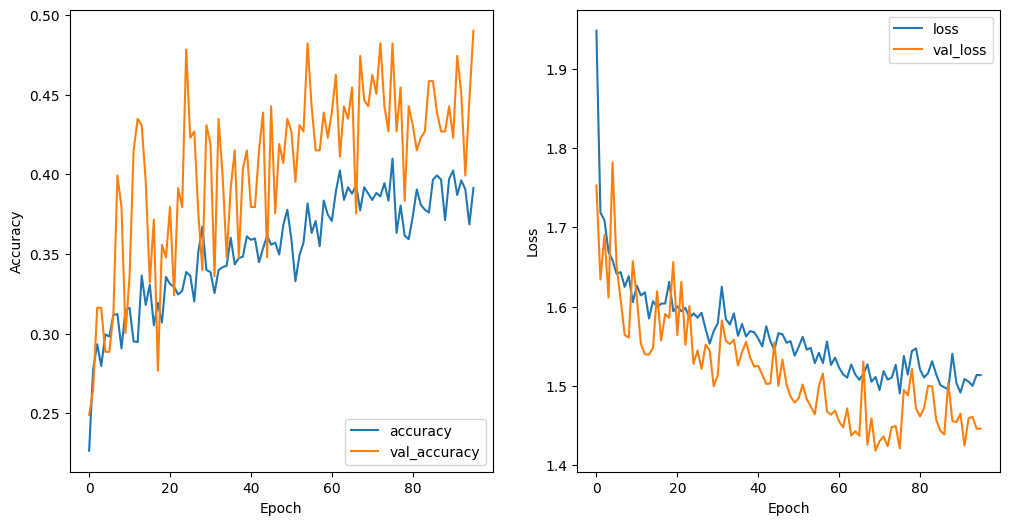

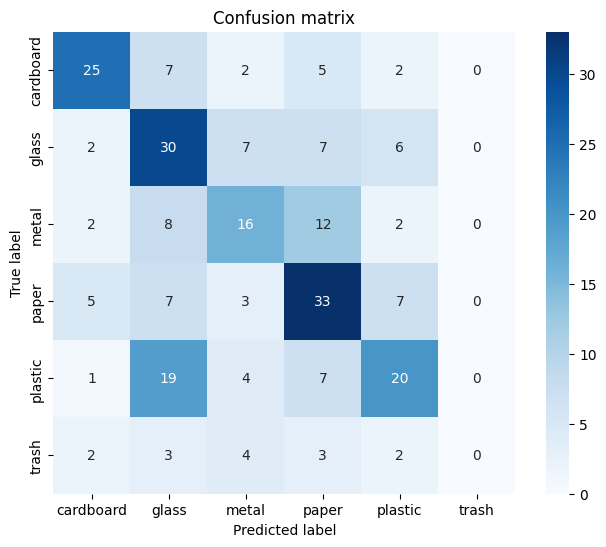

In [7]:
model_resnet_pretrained1.evaluate()

In [8]:
model_resnet2 = MModel('model_resnet2')
model_resnet2.set_model(model_resnet_pretrained(IMG_SIZE,fine_tune_amt=2000))
model_resnet2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 518, 390,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 256, 192,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 256, 192,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 256, 192,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 258, 194,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 128, 96,   │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 128, 96,   │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 128, 96,   │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 128, 96,   │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 128, 96,   │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 128, 96,   │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 128, 96,   │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 128, 96,   │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 128, 96,   │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 128, 96,   │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 128, 96,   │      1,024 │ conv2_block1_3_c

 Total params: 24,113,798 (91.99 MB)

 Trainable params: 24,060,678 (91.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [9]:
model_resnet2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_resnet2.fit(epochs=300, verbose=1, callbacks=[early_stopping])

(512, 384)
Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 316ms/step


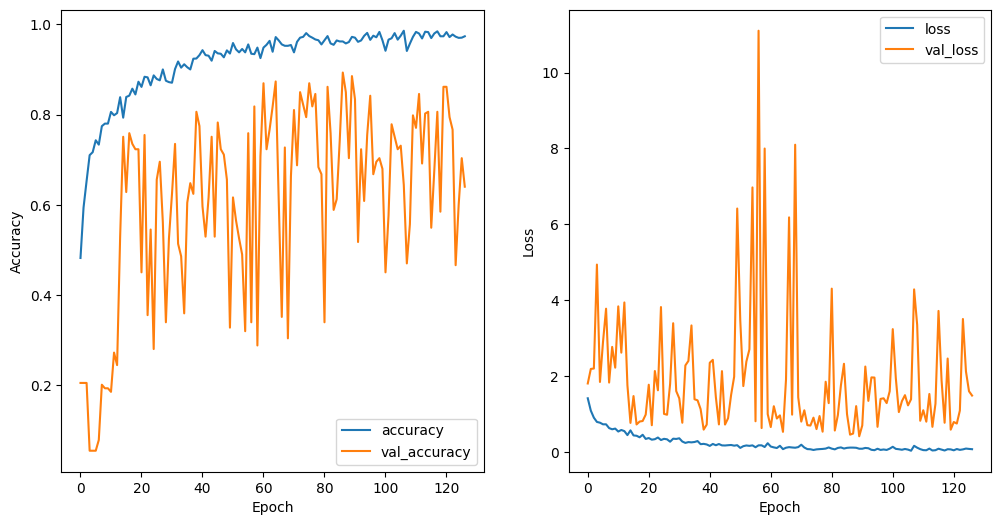

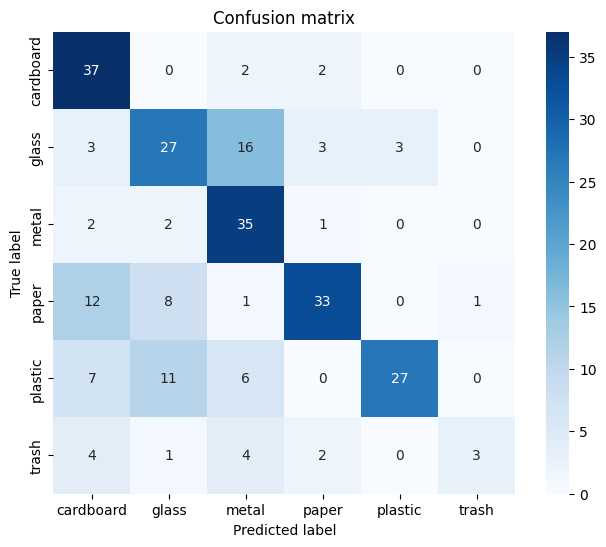

In [10]:
model_resnet2.evaluate()

In [11]:
from tensorflow.keras.applications import Xception

def xception_pretrained(IMG_SIZE, fine_tune_amt=0):
    xception = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    for layer in xception.layers:
        layer.trainable = False
        
    x = xception.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=xception.input, outputs=predictions)
    
    if fine_tune_amt > 0:
        for layer in xception.layers[-fine_tune_amt:]:
            layer.trainable = True
            
    return model

In [12]:
xception_pretrained1 = MModel('xception_pretrained1')
xception_pretrained1.set_model(xception_pretrained(IMG_SIZE,fine_tune_amt=2000))
xception_pretrained1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 512, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 255, 191,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 255, 191,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 255, 191,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 253, 189,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 253, 189,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 253, 189,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 253, 189,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 253, 189,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 253, 189,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 253, 189,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 253, 189,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 127, 95,   │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 127, 95,   │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 95,   │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 127, 95,   │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 127, 95,   │          0 │ add[0][0]       

 Total params: 21,387,566 (81.59 MB)

 Trainable params: 21,333,038 (81.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [13]:
xception_pretrained1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = xception_pretrained1.fit(epochs=300, verbose=1, callbacks=[early_stopping])

(512, 384)
Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.


/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/300


2025-05-01 03:40:59.746821: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11522', 12 bytes spill stores, 16 bytes spill loads

2025-05-01 03:41:00.086069: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11524', 36 bytes spill stores, 44 bytes spill loads

2025-05-01 03:41:00.196490: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11524', 32 bytes spill stores, 32 bytes spill loads

2025-05-01 03:41:00.408846: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11522', 4 bytes spill stores, 4 bytes spill loads

2025-05-01 03:41:00.464624: I external

 8/72 ━━━━━━━━━━━━━━━━━━━━ 34s 540ms/step - accuracy: 0.3703 - loss: 1.5518

2025-05-01 03:41:40.246130: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11290', 12 bytes spill stores, 12 bytes spill loads

2025-05-01 03:41:40.292243: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11290', 8 bytes spill stores, 8 bytes spill loads

2025-05-01 03:41:40.433732: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11290', 112 bytes spill stores, 112 bytes spill loads

2025-05-01 03:41:40.575677: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11290', 4012 bytes spill stores, 4008 bytes spill loads

2025-05-01 03:41:40.804692: I ex

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.6254 - loss: 1.0230

2025-05-01 03:42:32.519659: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-01 03:42:32.710527: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-01 03:42:49.026918: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng34{k2=2,k4=1,k5=0,k6=0,k7=0,k19=0} for conv %cudnn-conv.78 = (f32[29,128,253,189]{3,2,1,0}, u8[0]{0}) custom-call(f32[29,128,253,189]{3,2,1,0} %bitcast.4653, f32[128,1,3,3]{3,2,1,0} %bitcast.4660), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", metadata={op_type="DepthwiseConv2dNative" op_name="functional_2_1/block2_sepconv2_1/separable_con

72/72 ━━━━━━━━━━━━━━━━━━━━ 116s 988ms/step - accuracy: 0.6265 - loss: 1.0207 - val_accuracy: 0.4506 - val_loss: 5.3493
Epoch 2/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 587ms/step - accuracy: 0.8210 - loss: 0.5416 - val_accuracy: 0.5178 - val_loss: 2.7076
Epoch 3/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 588ms/step - accuracy: 0.8529 - loss: 0.4293 - val_accuracy: 0.6917 - val_loss: 1.3131
Epoch 4/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 583ms/step - accuracy: 0.8664 - loss: 0.3893 - val_accuracy: 0.6561 - val_loss: 2.4475
Epoch 5/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 584ms/step - accuracy: 0.8874 - loss: 0.3438 - val_accuracy: 0.6087 - val_loss: 1.5782
Epoch 6/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 584ms/step - accuracy: 0.8795 - loss: 0.3367 - val_accuracy: 0.6206 - val_loss: 1.4997
Epoch 7/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 585ms/step - accuracy: 0.9108 - loss: 0.2625 - val_accuracy: 0.6759 - val_loss: 1.4668
Epoch 8/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 581ms/step - accuracy: 0.8747 - loss: 0.3593 - val_accurac

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step


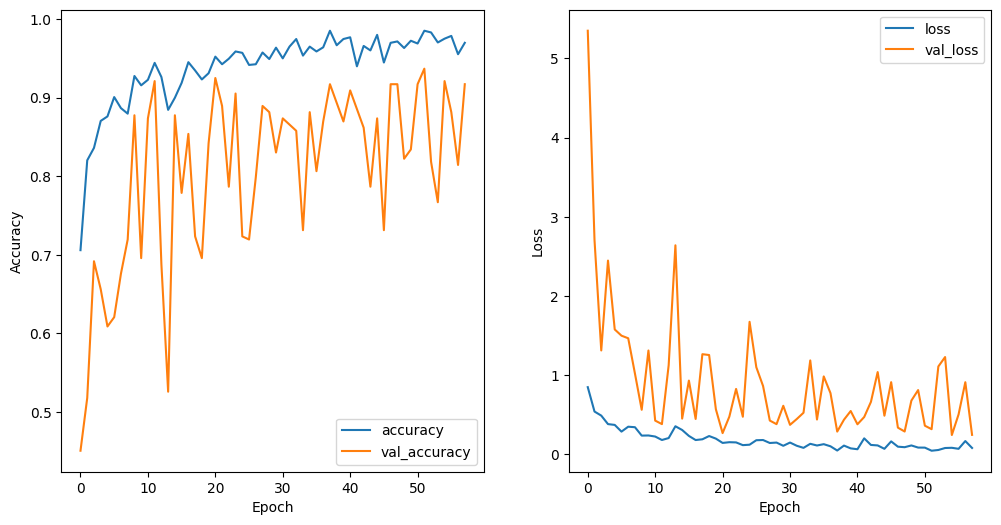

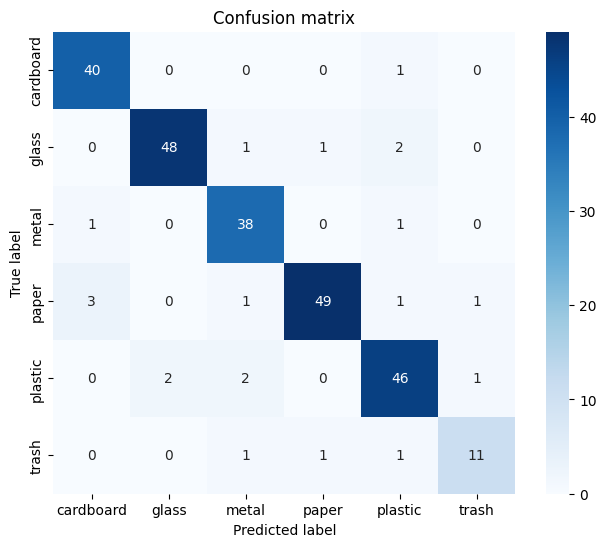

In [14]:
xception_pretrained1.evaluate()

In [15]:
from tensorflow.keras.applications import EfficientNetB0

def efficientnetb0_pretrained(IMG_SIZE, fine_tune_amt=0):
    efficientnetb0 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    for layer in efficientnetb0.layers:
        layer.trainable = False
        
    x = efficientnetb0.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=efficientnetb0.input, outputs=predictions)
    
    if fine_tune_amt > 0:
        for layer in efficientnetb0.layers[-fine_tune_amt:]:
            layer.trainable = True
            
    return model

In [16]:
efficientnetb0_pretrained1 = MModel('efficientnetb0_pretrained1')
efficientnetb0_pretrained1.set_model(efficientnetb0_pretrained(IMG_SIZE,fine_tune_amt=2000))
efficientnetb0_pretrained1.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 512, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 512, 384,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 512, 384,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 512, 384,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 513, 385,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 256, 192,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 256, 192,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 256, 192,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 256, 192,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 256, 192,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 256, 192,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 256, 192,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 256, 192,  │        512 │ block1a_se_excit

 Total params: 4,379,049 (16.70 MB)

 Trainable params: 4,337,026 (16.54 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [17]:
efficientnetb0_pretrained1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = efficientnetb0_pretrained1.fit(epochs=300, verbose=1, callbacks=[early_stopping])

(512, 384)
Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.


/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/300


2025-05-01 04:22:44.373493: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19222', 204 bytes spill stores, 204 bytes spill loads

2025-05-01 04:22:44.398972: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19222_0', 464 bytes spill stores, 1372 bytes spill loads

2025-05-01 04:22:44.836863: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19222', 5616 bytes spill stores, 5612 bytes spill loads

2025-05-01 04:22:44.871862: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19593', 12 bytes spill stores, 16 bytes spill loads

2025-05-01 04:22:44.93012

66/72 ━━━━━━━━━━━━━━━━━━━━ 3s 559ms/step - accuracy: 0.6073 - loss: 1.0630

2025-05-01 04:24:01.993278: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19222', 8 bytes spill stores, 8 bytes spill loads

2025-05-01 04:24:02.156133: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19222', 12 bytes spill stores, 12 bytes spill loads

2025-05-01 04:24:02.295304: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19222', 112 bytes spill stores, 112 bytes spill loads

2025-05-01 04:24:02.346182: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19222_0', 176 bytes spill stores, 524 bytes spill loads

2025-05-01 04:24:02.082628: I ex

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.6150 - loss: 1.0427

2025-05-01 04:24:25.849899: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2076', 220 bytes spill stores, 220 bytes spill loads

2025-05-01 04:24:26.015259: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2076', 8 bytes spill stores, 8 bytes spill loads

2025-05-01 04:24:26.098647: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2076_0', 444 bytes spill stores, 1384 bytes spill loads

2025-05-01 04:24:26.236303: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2076', 5388 bytes spill stores, 5392 bytes spill loads

2025-05-01 04:24:26.279542: I e

72/72 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6161 - loss: 1.0396 - val_accuracy: 0.2174 - val_loss: 2.1224
Epoch 2/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 564ms/step - accuracy: 0.8174 - loss: 0.5046 - val_accuracy: 0.1621 - val_loss: 2.0765
Epoch 3/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 573ms/step - accuracy: 0.8590 - loss: 0.4129 - val_accuracy: 0.2174 - val_loss: 2.2886
Epoch 4/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 567ms/step - accuracy: 0.8888 - loss: 0.2836 - val_accuracy: 0.1581 - val_loss: 2.3046
Epoch 5/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 567ms/step - accuracy: 0.8994 - loss: 0.2733 - val_accuracy: 0.1502 - val_loss: 2.7384
Epoch 6/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 571ms/step - accuracy: 0.9091 - loss: 0.2607 - val_accuracy: 0.1621 - val_loss: 4.8839
Epoch 7/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 567ms/step - accuracy: 0.9287 - loss: 0.1979 - val_accuracy: 0.1581 - val_loss: 2.6676
Epoch 8/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 570ms/step - accuracy: 0.9016 - loss: 0.2647 - val_accuracy: 

IOStream.flush timed out


72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 568ms/step - accuracy: 0.9827 - loss: 0.0625 - val_accuracy: 0.1581 - val_loss: 5.7363
Epoch 89/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 566ms/step - accuracy: 0.9841 - loss: 0.0487 - val_accuracy: 0.1581 - val_loss: 3.3536


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step


/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

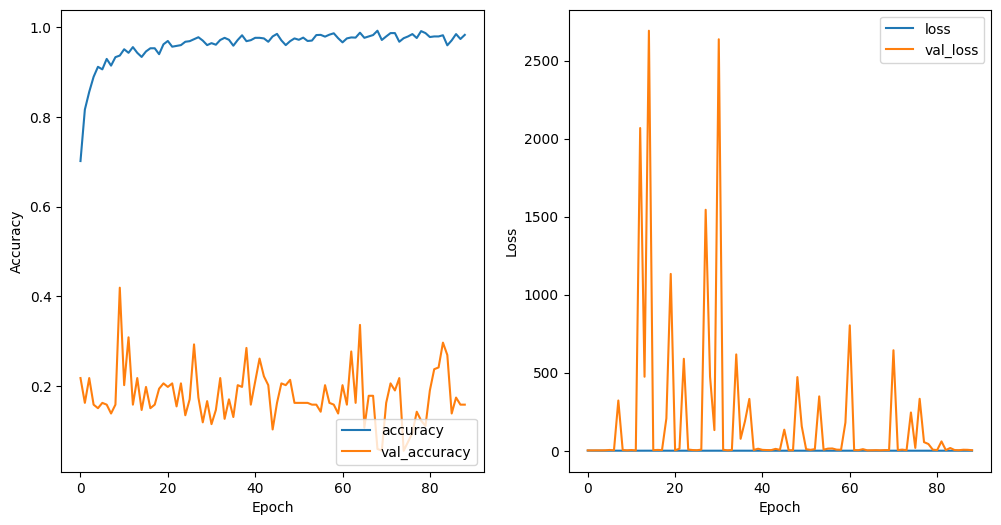

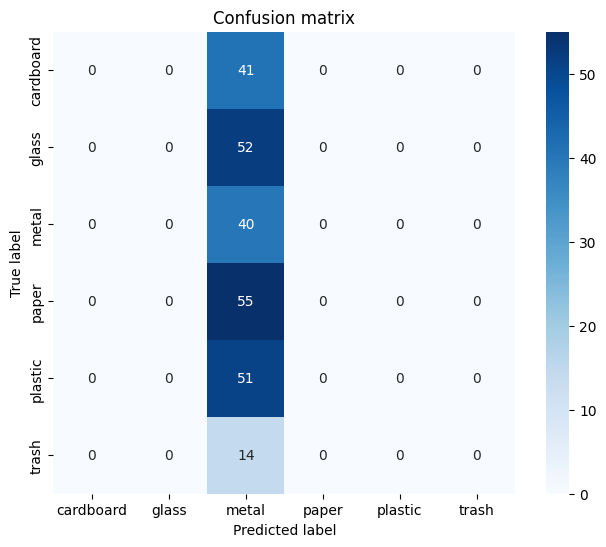

In [18]:
efficientnetb0_pretrained1.evaluate()

In [19]:
from tensorflow.keras.applications import MobileNetV2

def mobilenetv2_pretrained(IMG_SIZE, fine_tune_amt=0):
    mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    for layer in mobilenetv2.layers:
        layer.trainable = False
        
    x = mobilenetv2.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=mobilenetv2.input, outputs=predictions)
    
    if fine_tune_amt > 0:
        for layer in mobilenetv2.layers[-fine_tune_amt:]:
            layer.trainable = True
            
    return model

In [20]:
mobilenetv2_pretrained1 = MModel('mobilenetv2_pretrained1')
mobilenetv2_pretrained1.set_model(mobilenetv2_pretrained(IMG_SIZE,fine_tune_amt=2000))
mobilenetv2_pretrained1.summary()

/tmp/ipykernel_1365/3530378633.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 512, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 256, 192,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 256, 192,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 256, 192,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 256, 192,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 256, 192,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 256, 192,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 256, 192,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 256, 192,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 256, 192,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 256, 192,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 256, 192,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 257, 193,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 128, 96,   │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 128, 96,   │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 128, 96,   │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 128, 96,   │      2,304 │ block_1_depthwis

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 2,553,350 (9.74 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [21]:
mobilenetv2_pretrained1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = mobilenetv2_pretrained1.fit(epochs=300, verbose=1, callbacks=[early_stopping])

(512, 384)
Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.


/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/300


2025-05-01 05:24:57.840631: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-01 05:24:57.973918: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-01 05:24:58.117518: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-01 05:24:58.250299: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-01 05:24:58.384601: E external/local_xla/xla/stream_

72/72 ━━━━━━━━━━━━━━━━━━━━ 75s 715ms/step - accuracy: 0.5931 - loss: 1.0846 - val_accuracy: 0.1858 - val_loss: 12.6686
Epoch 2/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 558ms/step - accuracy: 0.7666 - loss: 0.6444 - val_accuracy: 0.1502 - val_loss: 18.2779
Epoch 3/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 561ms/step - accuracy: 0.7629 - loss: 0.6758 - val_accuracy: 0.2134 - val_loss: 12.1839
Epoch 4/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 559ms/step - accuracy: 0.8189 - loss: 0.5391 - val_accuracy: 0.1581 - val_loss: 13.4612
Epoch 5/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 564ms/step - accuracy: 0.8025 - loss: 0.5823 - val_accuracy: 0.1700 - val_loss: 11.6079
Epoch 6/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 558ms/step - accuracy: 0.8549 - loss: 0.4081 - val_accuracy: 0.2055 - val_loss: 30.1424
Epoch 7/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 560ms/step - accuracy: 0.8320 - loss: 0.4936 - val_accuracy: 0.2055 - val_loss: 15.6780
Epoch 8/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 562ms/step - accuracy: 0.8653 - loss: 0.3784 - val_a

IOStream.flush timed out


72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 567ms/step - accuracy: 0.9750 - loss: 0.0847 - val_accuracy: 0.6008 - val_loss: 2.4892
Epoch 70/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 571ms/step - accuracy: 0.9775 - loss: 0.0663 - val_accuracy: 0.5810 - val_loss: 3.6261
Epoch 71/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 562ms/step - accuracy: 0.9640 - loss: 0.0990 - val_accuracy: 0.6403 - val_loss: 2.6103
Epoch 72/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 560ms/step - accuracy: 0.9631 - loss: 0.1092 - val_accuracy: 0.3004 - val_loss: 10.4404
Epoch 73/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 561ms/step - accuracy: 0.9289 - loss: 0.1861 - val_accuracy: 0.5692 - val_loss: 2.9066
Epoch 74/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 560ms/step - accuracy: 0.9695 - loss: 0.1012 - val_accuracy: 0.5059 - val_loss: 4.5668


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step


/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

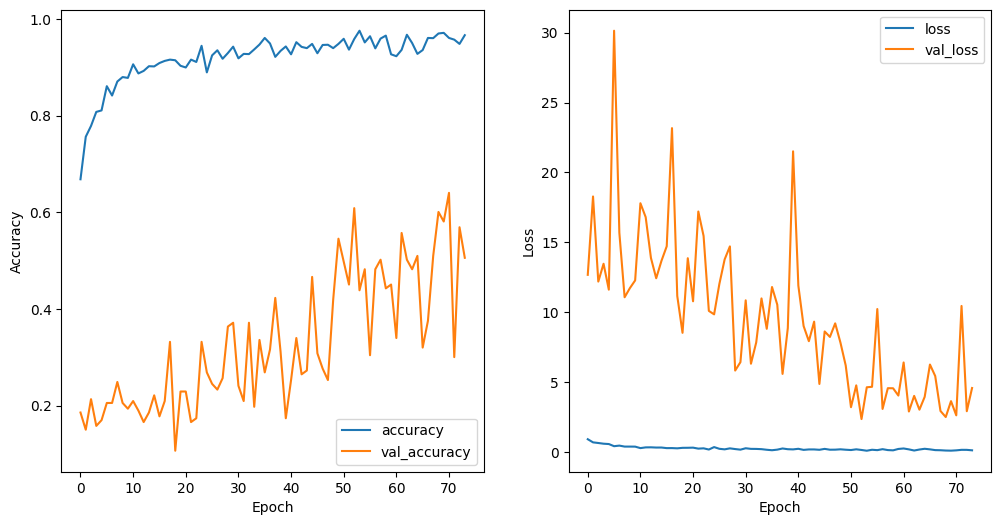

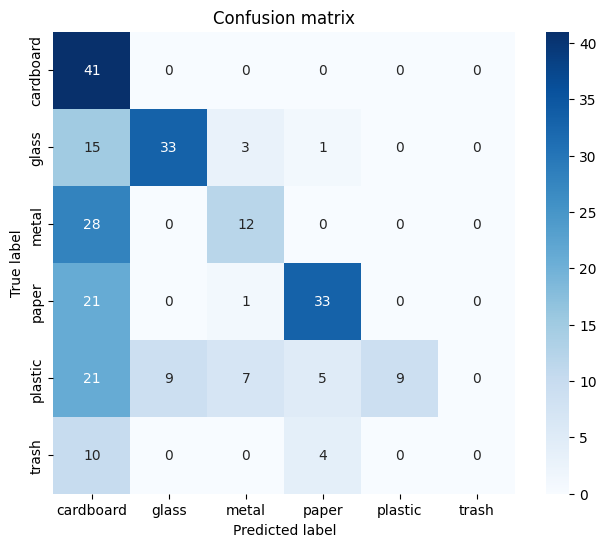

In [22]:
mobilenetv2_pretrained1.evaluate()